In [1]:
#pip install wordcloud

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests

import nltk
from sklearn.manifold import TSNE
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import string
import re
import scipy.stats as stats
from nltk import FreqDist

np.random.seed(7)

### Final Data Sources

In [3]:
df_KaggleTrain = pd.read_csv('data/KaggleTrain.csv')

In [4]:
#1: unreliable
#0: reliable
df_KaggleTrain

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [5]:
df_KaggleTrain.drop(['author', 'id'], axis=1, inplace=True)
df_KaggleTrain['source'] = 'Kaggle'
df_KaggleTrain

title  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...   
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                      Why the Truth Might Get You Fired   
3      15 Civilians Killed In Single US Airstrike Hav...   
4      Iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799                          What Keeps the F-35 Alive   

                                                    text  label  source  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  Kaggle  
1      Ever get the feeling your life circles the rou...      0  Kaggle  
2      Why the Truth Might Get You Fired October 29, ...      1  Kaggle  
3      Videos 15 Civilians Killed In Single US Airstr...      1  Kaggle  
4      Print \nAn Iranian woman has been sentenced to...      1  Kaggle  
...                                                  ...    ...     ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  Kaggle  
20796  When the Green Bay Packers lost to the Washing...      0  Kaggle  
20797  The Macy’s of today grew from the union of sev...      0  Kaggle  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  Kaggle  
20799    David Swanson is an author, activist, journa...      1  Kaggle  

[20800 rows x 4 columns]

In [6]:
df_DataFlair = pd.read_csv('data/DataFlairnews.csv')

In [7]:
df_DataFlair

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4     It's primary day in New York and front-runners...  REAL  
...                                                 ...   ...  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  

[6335 rows x 4 columns]

In [8]:
df_DataFlair['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [9]:
df_DataFlair.text[0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [10]:
df_DataFlair.drop('Unnamed: 0', axis=1, inplace=True)
df_DataFlair['source'] = 'DataFlair'
df_DataFlair

title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label     source  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  DataFlair  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  DataFlair  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  DataFlair  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  DataFlair  
4     It's primary day in New York and front-runners...  REAL  DataFlair  
...                                                 ...   ...        ...  
6330  The State Department told the Republican Natio...  REAL  DataFlair  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  DataFlair  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  DataFlair  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  DataFlair  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  DataFlair  

[6335 rows x 4 columns]

In [11]:
df_ISOT_true = pd.read_csv('data/ISOTTrue.csv')
df_ISOT_false = pd.read_csv('data/ISOTFake.csv')

In [12]:
df_ISOT_false

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [13]:
df_ISOT_true

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [14]:
df_ISOT_true['label'] = 0
df_ISOT_true['source'] = 'ISOT'
df_ISOT_false['label'] = 1
df_ISOT_false['source'] = 'ISOT'
df_ISOT_true.drop(['subject', 'date'], axis=1, inplace=True)
df_ISOT_false.drop(['subject', 'date'], axis=1, inplace=True)

### Data Description

ISOT - focused mostly on collecting articles from 2016 to 2017. https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php <br>
Kaggle - https://www.kaggle.com/c/fake-news/overview <br>
Dataflair - https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

In [15]:
dfList = [df_ISOT_true, df_ISOT_false, df_DataFlair, df_KaggleTrain]
df_MAIN = pd.concat(dfList, ignore_index=True)
df_MAIN

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT  
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT  
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT  
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT  
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT  
...                                                  ...   ...     ...  
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle  
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle  
72030  The Macy’s of today grew from the union of sev...     0  Kaggle  
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle  
72032    David Swanson is an author, activist, journa...     1  Kaggle  

[72033 rows x 4 columns]

In [16]:
df_MAIN['label'].value_counts()

1       33894
0       31804
REAL     3171
FAKE     3164
Name: label, dtype: int64

In [17]:
#0 = True
#1 = False

conditions = [
    df_MAIN['label'] == 1, 
    df_MAIN['label'] == 0,
    df_MAIN['label'] == 'REAL',
    df_MAIN['label'] == 'FAKE'
]

choices = [
    1, 
    0, 
    0,
    1
]

df_MAIN['label'] = np.select(conditions, choices, default='NA')
df_MAIN['label'].value_counts()

1    37058
0    34975
Name: label, dtype: int64

In [18]:
df = df_MAIN
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT  
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT  
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT  
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT  
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT  
...                                                  ...   ...     ...  
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle  
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle  
72030  The Macy’s of today grew from the union of sev...     0  Kaggle  
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle  
72032    David Swanson is an author, activist, journa...     1  Kaggle  

[72033 rows x 4 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72033 entries, 0 to 72032
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71475 non-null  object
 1   text    71994 non-null  object
 2   label   72033 non-null  object
 3   source  72033 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71436 entries, 0 to 72032
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71436 non-null  object
 1   text    71436 non-null  object
 2   label   71436 non-null  object
 3   source  71436 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [22]:
#removing Reuters heading

def reuters(text):
    reuters = '(Reuters) - '
    if reuters in text:
        return text[text.find(reuters)+len(reuters):]
    else:
        return text

df['text_cleaned'] = df['text'].apply(reuters)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  
0      The head of a conservative Republican faction ...  
1      Transgender people will be allowed for the fir...  
2      The special counsel investigation of links bet...  
3      Trump campaign adviser George Papadopoulos tol...  
4      President Donald Trump called on the U.S. Post...  
...                                                  ...  
72028  Rapper T. I. unloaded on black celebrities who...  
72029  When the Green Bay Packers lost to the Washing...  
72030  The Macy’s of today grew from the union of sev...  
72031  NATO, Russia To Hold Parallel Exercises In Bal...  
72032    David Swanson is an author, activist, journa...  

[71436 rows x 5 columns]

In [23]:
punct = set(string.punctuation)
words = stopwords.words("english")
custom_words = ['’', '“', '”', '—']
for i in custom_words:
    words.append(i)
words = set(words)

def tokenize_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in punct]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return nltk.word_tokenize(text_no_doublespace)

df['text_tokenized'] = df['text_cleaned'].apply(tokenize_text)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allowed for the fir...   
2      The special counsel investigation of links bet...   
3      Trump campaign adviser George Papadopoulos tol...   
4      President Donald Trump called on the U.S. Post...   
...                                                  ...   
72028  Rapper T. I. unloaded on black celebrities who...   
72029  When the Green Bay Packers lost to the Washing...   
72030  The Macy’s of today grew from the union of sev...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032    David Swanson is an author, activist, journa...   

                                          text_tokenized  
0      [the, head, of, a, conservative, republican, f...  
1      [transgender, people, will, be, allowed, for, ...  
2      [the, special, counsel, investigation, of, lin...  
3      [trump, campaign, adviser, george, papadopoulo...  
4      [president, donald, trump, called, on, the, us...  
...                                                  ...  
72028  [rapper, t, i, unloaded, on, black, celebritie...  
72029  [when, the, green, bay, packers, lost, to, the...  
72030  [the, macy, ’, s, of, today, grew, from, the, ...  
72031  [nato, russia, to, hold, parallel, exercises, ...  
72032  [david, swanson, is, an, author, activist, jou...  

[71436 rows x 6 columns]

In [24]:
#removing stopwords
df['text_tokenized'] = df['text_tokenized'].apply(lambda x: [item for item in x if item not in words])
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allowed for the fir...   
2      The special counsel investigation of links bet...   
3      Trump campaign adviser George Papadopoulos tol...   
4      President Donald Trump called on the U.S. Post...   
...                                                  ...   
72028  Rapper T. I. unloaded on black celebrities who...   
72029  When the Green Bay Packers lost to the Washing...   
72030  The Macy’s of today grew from the union of sev...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032    David Swanson is an author, activist, journa...   

                                          text_tokenized  
0      [head, conservative, republican, faction, us, ...  
1      [transgender, people, allowed, first, time, en...  
2      [special, counsel, investigation, links, russi...  
3      [trump, campaign, adviser, george, papadopoulo...  
4      [president, donald, trump, called, us, postal,...  
...                                                  ...  
72028  [rapper, unloaded, black, celebrities, met, do...  
72029  [green, bay, packers, lost, washington, redski...  
72030  [macy, today, grew, union, several, great, nam...  
72031  [nato, russia, hold, parallel, exercises, balk...  
72032  [david, swanson, author, activist, journalist,...  

[71436 rows x 6 columns]

In [25]:
df['text_tokenized_string'] = df['text_tokenized'].apply(' '.join)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allowed for the fir...   
2      The special counsel investigation of links bet...   
3      Trump campaign adviser George Papadopoulos tol...   
4      President Donald Trump called on the U.S. Post...   
...                                                  ...   
72028  Rapper T. I. unloaded on black celebrities who...   
72029  When the Green Bay Packers lost to the Washing...   
72030  The Macy’s of today grew from the union of sev...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032    David Swanson is an author, activist, journa...   

                                          text_tokenized  \
0      [head, conservative, republican, faction, us, ...   
1      [transgender, people, allowed, first, time, en...   
2      [special, counsel, investigation, links, russi...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, us, postal,...   
...                                                  ...   
72028  [rapper, unloaded, black, celebrities, met, do...   
72029  [green, bay, packers, lost, washington, redski...   
72030  [macy, today, grew, union, several, great, nam...   
72031  [nato, russia, hold, parallel, exercises, balk...   
72032  [david, swanson, author, activist, journalist,...   

                                   text_tokenized_string  
0      head conservative republican faction us congre...  
1      transgender people allowed first time enlist u...  
2      special counsel investigation links russia pre...  
3      trump campaign adviser george papadopoulos tol...  
4      president donald trump called us postal servic...  
...                                                  ...  
72028  rapper unloaded black celebrities met donald t...  
72029  green bay packers lost washington redskins wee...  
72030  macy today grew union several great names amer...  
72031  nato russia hold parallel exercises balkans pr...  
72032  david swanson author activist journalist radio...  

[71436 rows x 7 columns]

In [26]:
#POS tagging
df['text_pos_tagged'] = df['text_tokenized_string'].apply(word_tokenize).apply(pos_tag)

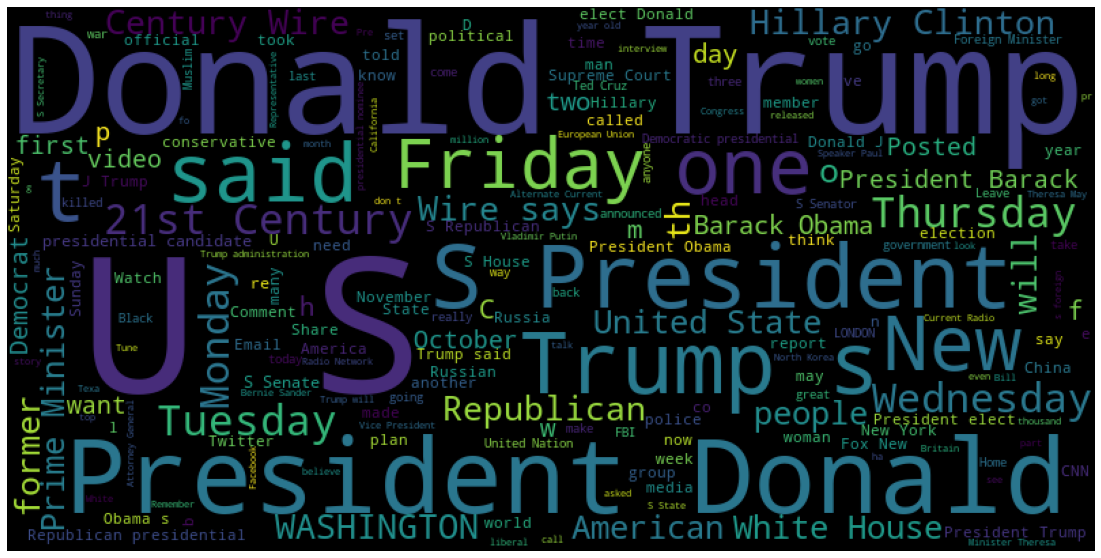

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20,10))

#convert list to string and generate
text = WordCloud(width=800, height=400).generate(df['text_cleaned'].to_string())
plt.imshow(text)
plt.axis("off")
plt.show()

In [28]:
articles_concat = []

for text in df['text_tokenized']:
    articles_concat += text

articles_concat

['head',
 'conservative',
 'republican',
 'faction',
 'us',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'also',
 'want',
 'proportional',
 'increases',
 '

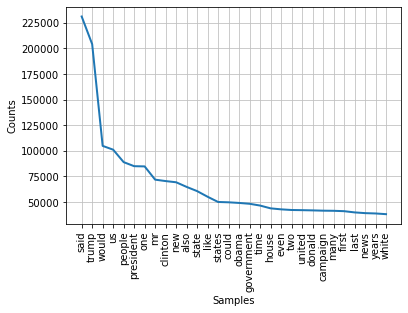

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.plot(30,cumulative=False)

In [30]:
display(articles_freqdist.most_common(200))

[('said', 231159),
 ('trump', 204174),
 ('would', 104823),
 ('us', 101110),
 ('people', 88959),
 ('president', 85000),
 ('one', 84783),
 ('mr', 71845),
 ('clinton', 70459),
 ('new', 69292),
 ('also', 64768),
 ('state', 60660),
 ('like', 55150),
 ('states', 50051),
 ('could', 49728),
 ('obama', 49112),
 ('government', 48286),
 ('time', 46554),
 ('house', 43830),
 ('even', 42853),
 ('two', 42223),
 ('united', 42060),
 ('donald', 41838),
 ('campaign', 41553),
 ('many', 41438),
 ('first', 41071),
 ('last', 39879),
 ('news', 39162),
 ('years', 38835),
 ('white', 38148),
 ('hillary', 37875),
 ('republican', 37695),
 ('told', 37653),
 ('election', 37039),
 ('year', 36670),
 ('american', 34620),
 ('country', 34336),
 ('party', 34124),
 ('get', 33138),
 ('may', 32865),
 ('world', 31933),
 ('political', 31361),
 ('make', 31200),
 ('going', 31100),
 ('media', 30490),
 ('say', 30335),
 ('made', 30299),
 ('former', 30222),
 ('national', 29176),
 ('back', 28850),
 ('way', 28456),
 ('percent', 28150)

In [31]:
#frequency distribution for TRUE articles

articles_concat_true = []

for text in df[df['label']=='0']['text_tokenized']:
    articles_concat_true += text

articles_concat_true

articles_freqdist = FreqDist(articles_concat_true)
articles_freqdist.plot(30,cumulative=False)

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
display(articles_freqdist.most_common(200))

[('said', 184405),
 ('trump', 104695),
 ('mr', 65917),
 ('would', 62123),
 ('us', 52065),
 ('president', 49159),
 ('one', 41549),
 ('people', 41432),
 ('new', 41327),
 ('state', 37051),
 ('also', 36508),
 ('states', 31786),
 ('could', 29666),
 ('government', 29343),
 ('house', 28364),
 ('united', 27487),
 ('clinton', 27352),
 ('two', 26419),
 ('last', 26395),
 ('republican', 25392),
 ('like', 24369),
 ('year', 24091),
 ('told', 23944),
 ('campaign', 23119),
 ('first', 22775),
 ('time', 22404),
 ('obama', 22058),
 ('years', 22011),
 ('party', 21848),
 ('many', 21253),
 ('percent', 20281),
 ('white', 19363),
 ('former', 19321),
 ('country', 18680),
 ('election', 18172),
 ('news', 18096),
 ('even', 17524),
 ('may', 17523),
 ('donald', 17517),
 ('political', 16998),
 ('national', 16921),
 ('security', 16900),
 ('officials', 16524),
 ('say', 16489),
 ('since', 16222),
 ('court', 16086),
 ('made', 16048),
 ('including', 15899),
 ('american', 15894),
 ('week', 15732),
 ('law', 15632),
 ('admi

In [33]:
#frequency distribution for FAKE articles

articles_concat_true = []

for text in df[df['label']=='1']['text_tokenized']:
    articles_concat_true += text

articles_concat_true

articles_freqdist = FreqDist(articles_concat_true)
articles_freqdist.plot(30,cumulative=False)

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
display(articles_freqdist.most_common(200))

[('trump', 99479),
 ('us', 49045),
 ('people', 47527),
 ('said', 46754),
 ('one', 43234),
 ('clinton', 43107),
 ('would', 42700),
 ('president', 35841),
 ('like', 30781),
 ('hillary', 30450),
 ('also', 28260),
 ('new', 27965),
 ('obama', 27054),
 ('even', 25329),
 ('donald', 24321),
 ('time', 24150),
 ('state', 23609),
 ('news', 21066),
 ('many', 20185),
 ('could', 20062),
 ('media', 19398),
 ('get', 19000),
 ('government', 18943),
 ('election', 18867),
 ('white', 18785),
 ('world', 18773),
 ('american', 18726),
 ('campaign', 18434),
 ('first', 18296),
 ('states', 18265),
 ('know', 18025),
 ('america', 17421),
 ('years', 16824),
 ('going', 16585),
 ('make', 16188),
 ('two', 15804),
 ('country', 15656),
 ('way', 15620),
 ('house', 15466),
 ('may', 15342),
 ('right', 14872),
 ('think', 14781),
 ('united', 14573),
 ('back', 14464),
 ('see', 14418),
 ('political', 14363),
 ('made', 14251),
 ('war', 14159),
 ('say', 13846),
 ('told', 13709),
 ('well', 13695),
 ('–', 13600),
 ('russia', 1357

In [35]:
#word cloud for TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[df['label']=='0']['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

In [36]:
#word cloud for FAKE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[df['label']=='1']['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

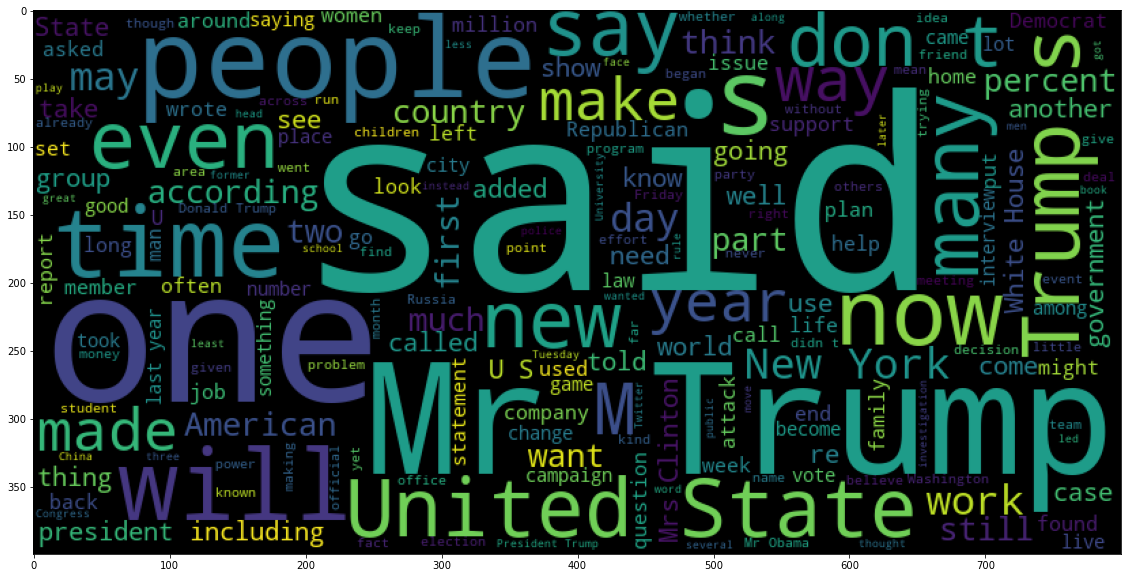

In [37]:
#word cloud for KAGGLE TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='Kaggle') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

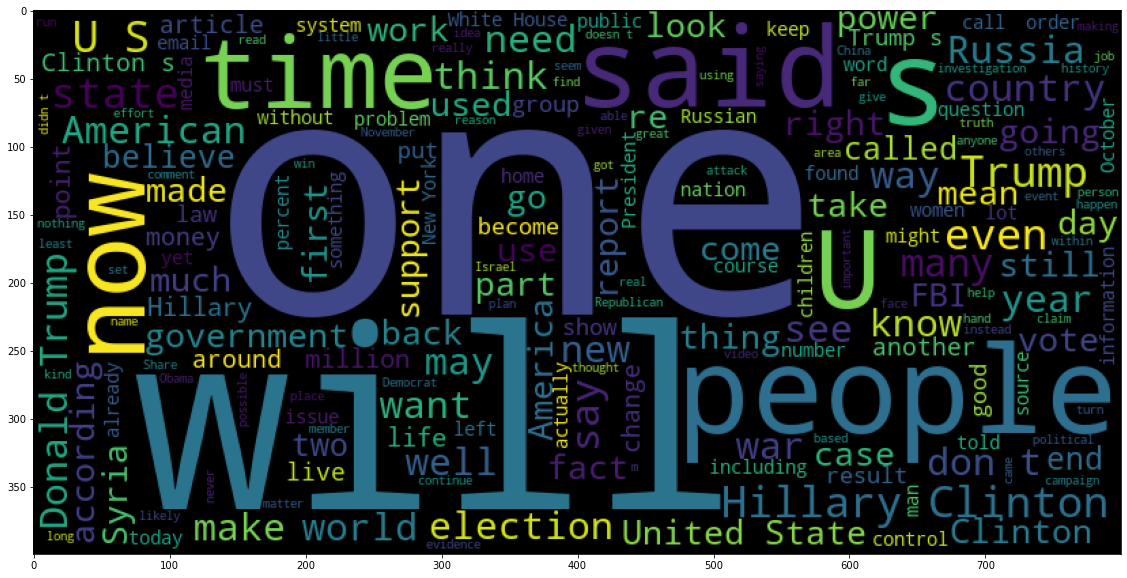

In [38]:
#word cloud for KAGGLE FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='Kaggle') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

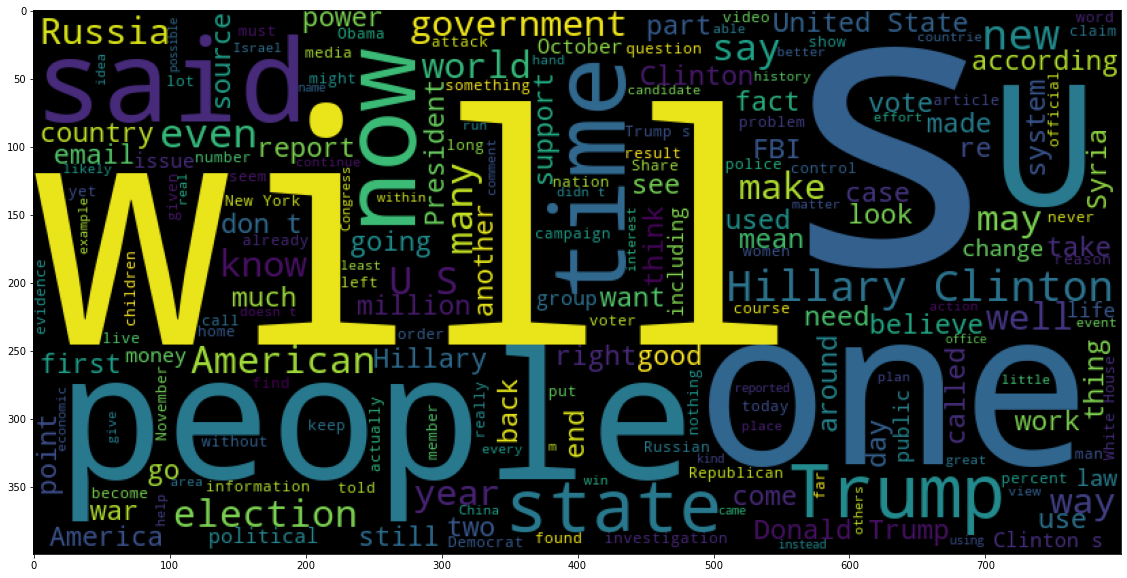

In [39]:
#word cloud for DataFlair FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='DataFlair') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

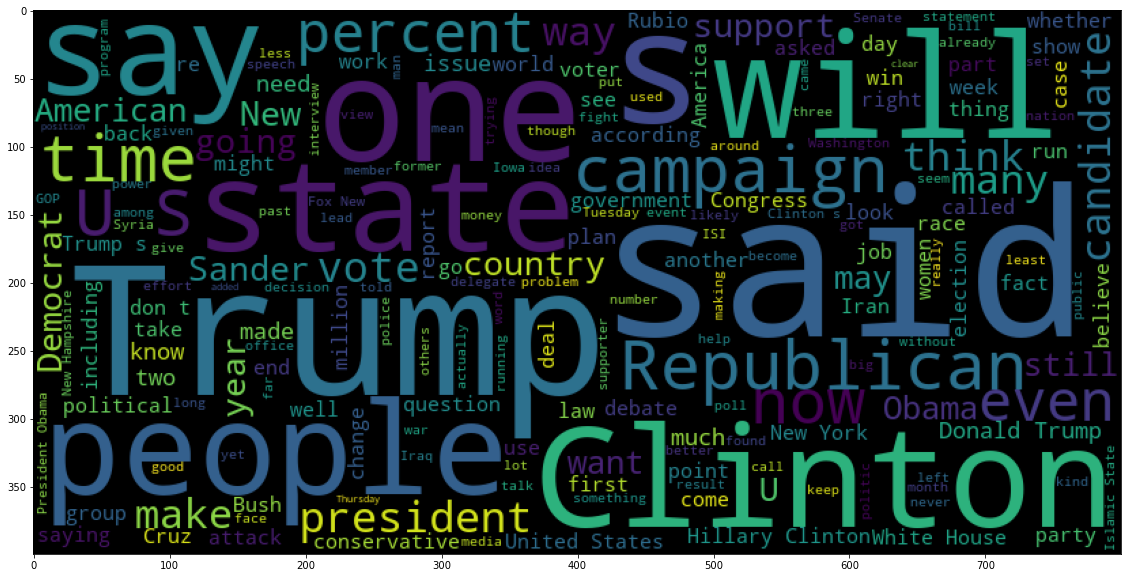

In [40]:
#word cloud for DataFlair TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='DataFlair') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

In [41]:
#word cloud for ISOT TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='ISOT') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

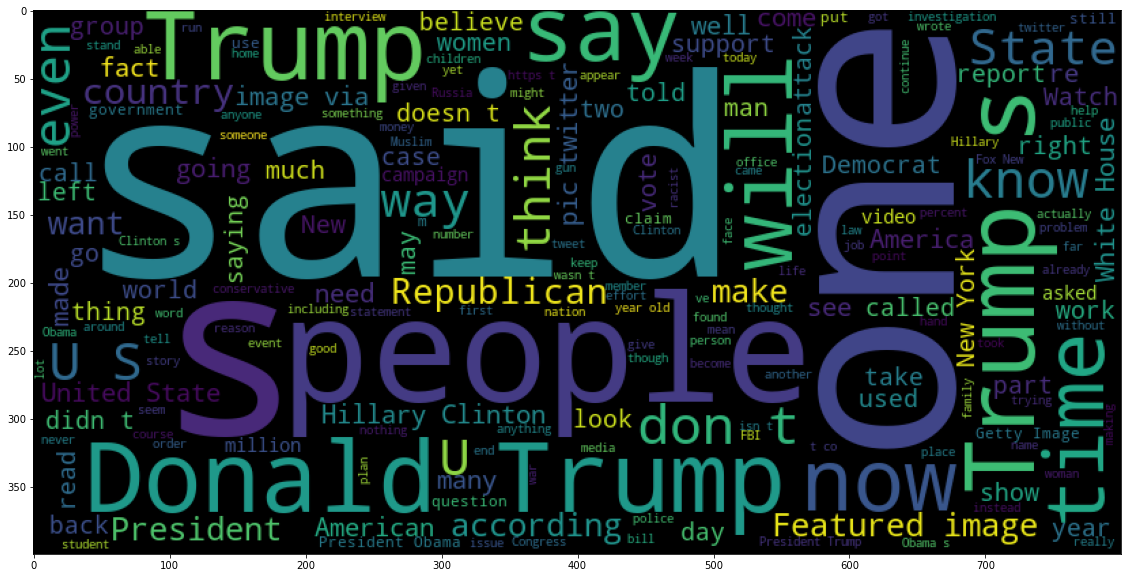

In [42]:
#word cloud for ISOT FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='ISOT') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

In [43]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allowed for the fir...   
2      The special counsel investigation of links bet...   
3      Trump campaign adviser George Papadopoulos tol...   
4      President Donald Trump called on the U.S. Post...   
...                                                  ...   
72028  Rapper T. I. unloaded on black celebrities who...   
72029  When the Green Bay Packers lost to the Washing...   
72030  The Macy’s of today grew from the union of sev...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032    David Swanson is an author, activist, journa...   

                                          text_tokenized  \
0      [head, conservative, republican, faction, us, ...   
1      [transgender, people, allowed, first, time, en...   
2      [special, counsel, investigation, links, russi...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, us, postal,...   
...                                                  ...   
72028  [rapper, unloaded, black, celebrities, met, do...   
72029  [green, bay, packers, lost, washington, redski...   
72030  [macy, today, grew, union, several, great, nam...   
72031  [nato, russia, hold, parallel, exercises, balk...   
72032  [david, swanson, author, activist, journalist,...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                         text_pos_tagged  
0      [(head, NN), (conservative, JJ), (republican, ...  
1      [(transgender, NN), (people, NNS), (allowed, V...  
2      [(special, JJ), (counsel, NN), (investigation,...  
3      [(trump, NN), (campaign, NN), (advi

In [44]:
# average length of data articles
df['text_cleaned'].str.len().mean()

3282.7669102413347

In [45]:
# average length of TRUE articles
true_lengths = df[df['label']=='0']['text_cleaned'].str.len()
true_lengths.mean()

3474.024588992137

In [46]:
# average length of FAKE articles
false_lengths = df[df['label']=='1']['text_cleaned'].str.len()
false_lengths.mean()

3099.304105756836

In [47]:
#t-test

#null = there is no difference in article length between REAL and FAKE
#alternative = there is a difference in article length between REAL and FAKE

stats.ttest_ind(false_lengths.values, true_lengths.values)

#Reject null. There is a difference in article length between REAL and FAKE

Ttest_indResult(statistic=-13.437612576680815, pvalue=4.0842474014524474e-41)

In [48]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      The head of a conservative Republican faction ...   
1      Transgender people will be allowed for the fir...   
2      The special counsel investigation of links bet...   
3      Trump campaign adviser George Papadopoulos tol...   
4      President Donald Trump called on the U.S. Post...   
...                                                  ...   
72028  Rapper T. I. unloaded on black celebrities who...   
72029  When the Green Bay Packers lost to the Washing...   
72030  The Macy’s of today grew from the union of sev...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032    David Swanson is an author, activist, journa...   

                                          text_tokenized  \
0      [head, conservative, republican, faction, us, ...   
1      [transgender, people, allowed, first, time, en...   
2      [special, counsel, investigation, links, russi...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, us, postal,...   
...                                                  ...   
72028  [rapper, unloaded, black, celebrities, met, do...   
72029  [green, bay, packers, lost, washington, redski...   
72030  [macy, today, grew, union, several, great, nam...   
72031  [nato, russia, hold, parallel, exercises, balk...   
72032  [david, swanson, author, activist, journalist,...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                         text_pos_tagged  
0      [(head, NN), (conservative, JJ), (republican, ...  
1      [(transgender, NN), (people, NNS), (allowed, V...  
2      [(special, JJ), (counsel, NN), (investigation,...  
3      [(trump, NN), (campaign, NN), (advi

https://advances.sciencemag.org/content/6/14/eaay3539

fake news comprises only 0.15% of Americans’ daily media diet

Because the volume of online content is so vast, even a very large numerator may constitute only a tiny fraction of the total 

Third, even if its prevalence is low relative to other types of content, fake news could be important either because it is disproportionately impactful or because it is concentrated on small subpopulations.